In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('data/TFRC_expression.csv', index_col=[0])

In [6]:
rna_df = pd.read_csv('data/rna_tissue_gtex.tsv.zip', index_col=[0], sep='\t')
tfrc_df = rna_df[rna_df['Gene name']=='TFRC']
del rna_df

tfrc_df = tfrc_df.groupby('Tissue').mean()

In [8]:
rna_df2 = pd.read_csv('data/rna_single_cell_type_tissue.tsv', index_col=[0], sep='\t')
tfrc_df2 = rna_df2[rna_df2['Gene name']=='TFRC']
tfrc_df2 = tfrc_df2.groupby('Tissue').mean()
tfrc_df['gtex_nTPM'] = tfrc_df['nTPM']
tfrc_df2['sc_nTPM'] = tfrc_df2['nTPM']

In [11]:
tfrc_df2['nTPM']

Tissue
adipose tissue     128.931818
bone marrow         49.890000
brain               24.404444
breast              43.016000
bronchus            39.013333
colon               79.927273
endometrium         35.188000
esophagus           35.960000
eye                 41.841667
heart muscle        62.122222
kidney              12.115385
liver               67.990000
lung               176.170370
lymph node          48.871429
ovary               51.629167
pancreas            55.944444
pbmc                12.381818
placenta            94.948148
prostate            23.220000
rectum              58.760000
salivary gland      37.854167
skeletal muscle     42.900000
skin                46.257895
small intestine     51.992308
spleen              36.322222
stomach             54.277778
testis              11.600000
thymus              29.370000
tongue              68.719048
vascular            35.575000
Name: nTPM, dtype: float64

In [61]:
tfrc_tissue

,Gene name,Tissue,nTPM
Gene,,,
ENSG00000072274,TFRC,adipose tissue,44.6
ENSG00000072274,TFRC,adrenal gland,28.7
ENSG00000072274,TFRC,amygdala,21.6
ENSG00000072274,TFRC,appendix,63.4
ENSG00000072274,TFRC,basal ganglia,18.3
ENSG00000072274,TFRC,bone marrow,254.5
ENSG00000072274,TFRC,breast,20.2
ENSG00000072274,TFRC,cerebellum,18.5
ENSG00000072274,TFRC,cerebral cortex,32.3


In [54]:
df = pd.read_csv('data/rna_tissue_consensus.tsv.zip', index_col=[0], sep='\t')

tfrc_tissue = df[df['Gene name'] == 'TFRC']

tfrc_organ = pd.DataFrame([])
brain_tiss = ['cerebral cortex','cerebellum','choroid plexus','basal ganglia','thalamus','hypothalamus','midbrain','pons','medulla oblongata','hippocampal formation','spinal cord','white matter','amygdala']

brain  = tfrc_tissue[tfrc_tissue['Tissue'].isin(brain_tiss)]

brain.mean()['nTPM']

tissue_expression = {'Brain': brain.mean()['nTPM'], 'Thyroid':20.1,'Lung':78.0,'Esophagus':36.0,'Stomach':21.4,'Liver':27.8,'Galbladder':24.9,'Pancreas':15.9,'Kidney':26.4,'Testis':21.6,'Prostate':13.2,'Ovary':93.9,'Cervix':31.3,'Breast':20.2,'Heart':31.0,'Skin':31.8,'Bone Marrow':254.5}

tissues = pd.DataFrame({'Tissue':tissue_expression.keys(), 'Expression':tissue_expression.values()})

tissue_df = tissues.set_index('Tissue')
tissue_df['Health'] = 'Healthy Tissue'

cancer_expression = {'Brain': 148.5, 'Thyroid':128.2,'Lung':170.1,'Esophagus':181.5,'Stomach':197.2,'Liver':145.1,'Galbladder':151.4,'Pancreas':147.0,'Kidney':163.6,'Testis':115.9,'Prostate':123.3,'Ovary':156.1,'Cervix':135.1,'Breast':192.4,'Skin':184.9,'Myeloma':118.3,'Lymphoma':335.4}

cancers = pd.DataFrame({'Tissue':cancer_expression.keys(), 'Expression':cancer_expression.values()})
cancers = cancers.set_index('Tissue')
cancers['Health'] = 'Primary Tumor'


/var/folders/t8/z05p65mn3j997gd006knx_lc0000gn/T/ipykernel_15174/268430414.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  brain.mean()['nTPM']
/var/folders/t8/z05p65mn3j997gd006knx_lc0000gn/T/ipykernel_15174/268430414.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tissue_expression = {'Brain': brain.mean()['nTPM'], 'Thyroid':20.1,'Lung':78.0,'Esophagus':36.0,'Stomach':21.4,'Liver':27.8,'Galbladder':24.9,'Pancreas':15.9,'Kidney':26.4,'Testis':21.6,'Prostate':13.2,'Ovary':93.9,'Cervix':31.3,'Breast':20.2,'Heart':31.0,'Skin':31.8,'Bone Marrow':254.5}


In [55]:
plot_df = tissue_df.append(cancers)

/var/folders/t8/z05p65mn3j997gd006knx_lc0000gn/T/ipykernel_15174/1513955538.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = tissue_df.append(cancers)


In [56]:
plot_df.reset_index(inplace=True)

In [57]:
plot_df =plot_df.rename(columns={'Health':'Status'})

In [58]:
plot_df

,Tissue,Expression,Status
0,Brain,21.884615,Healthy Tissue
1,Thyroid,20.100000,Healthy Tissue
2,Lung,78.000000,Healthy Tissue
3,Esophagus,36.000000,Healthy Tissue
4,Stomach,21.400000,Healthy Tissue
5,Liver,27.800000,Healthy Tissue
6,Galbladder,24.900000,Healthy Tissue
7,Pancreas,15.900000,Healthy Tissue
8,Kidney,26.400000,Healthy Tissue
9,Testis,21.600000,Healthy Tissue


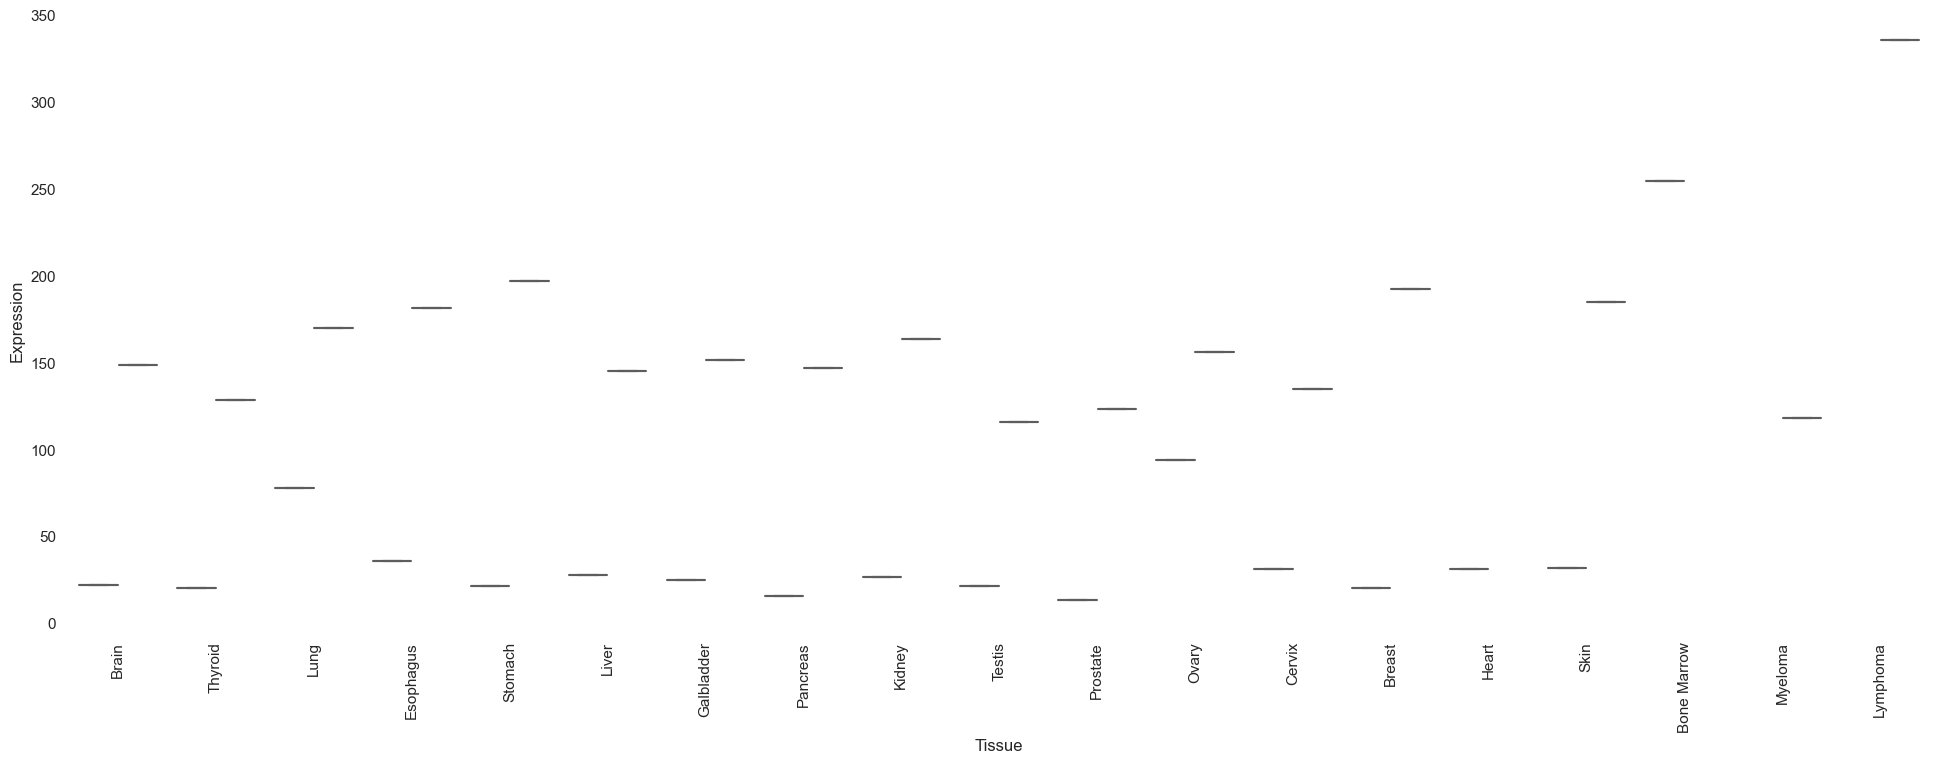

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(24,8)})
sns.set(font_scale=2)
sns.set_theme()
sns.set_style(style='white')

my_pal = {"Primary Tumor": "skyblue", "Healthy Tissue": "#FF6037"}

sns.boxplot(data=plot_df, x="Tissue", y="Expression", hue="Status",palette=my_pal)
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)

sns.despine(top=True, right=True, left=True, bottom=True)


# plt.savefig("merav_boxplot.pdf", format="pdf", bbox_inches="tight")


In [60]:
cancers

,Expression,Health
Tissue,,
Brain,148.5,Primary Tumor
Thyroid,128.2,Primary Tumor
Lung,170.1,Primary Tumor
Esophagus,181.5,Primary Tumor
Stomach,197.2,Primary Tumor
Liver,145.1,Primary Tumor
Galbladder,151.4,Primary Tumor
Pancreas,147.0,Primary Tumor
Kidney,163.6,Primary Tumor
